In [ ]:
#for mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure

% matplotlib inline

In [27]:
df = pd.read_csv("/content/cars_ds_final.csv", encoding='latin-1')
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,...,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,15 litres,CNG,1652 mm,3164 mm,1750 mm,Hatchback,4.0,NaN,NaN,NaN,36 km/kg,710 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,NaN,NaN,NaN,38PS@5500rpm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,21.9 km/litre,NaN,725 kg,5,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Elect

In [28]:
df.describe()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(6), int64(1), object(134)
memory usage: 1.4+ MB


In [30]:
df[df.isnull()].count()

Unnamed: 0           0
Make                 0
Model                0
Variant              0
Ex-Showroom_Price    0
                    ..
USB_Ports            0
Heads-Up_Display     0
Welcome_Lights       0
Battery              0
Electric_Range       0
Length: 141, dtype: int64

In [31]:
df[df.duplicated()].count()

Unnamed: 0           0
Make                 0
Model                0
Variant              0
Ex-Showroom_Price    0
                    ..
USB_Ports            0
Heads-Up_Display     0
Welcome_Lights       0
Battery              0
Electric_Range       0
Length: 141, dtype: int64

In [34]:
df=df.fillna('')
df=df.replace(' ', '')
df['Ex-Showroom_Price']=df['Ex-Showroom_Price'].str.replace(',','')
df['Ex-Showroom_Price']=df['Ex-Showroom_Price'].str.replace('Rs.','')
df['Displacement']=df['Displacement'].str.replace('cc','')

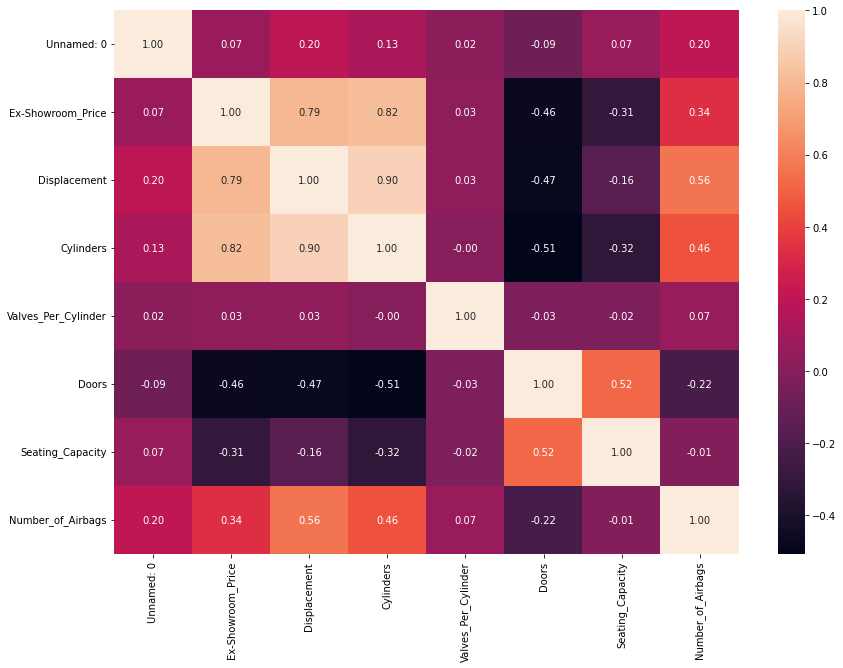

In [35]:
df[['Cylinders', 'Valves_Per_Cylinder', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'Ex-Showroom_Price', 'Displacement']] = df[['Cylinders', 'Valves_Per_Cylinder', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'Ex-Showroom_Price', 'Displacement']].apply(pd.to_numeric)

f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

In [36]:
df[df.Make =='Tata'].tail()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,...,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
1141,1141,Tata,Harrier,Revotorq Dark Edition,1730755,1956.0,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,50 litres,Diesel,1706 mm,4598 mm,1894 mm,Hatchback,5.0,,,16.7 km/litre,,,6,205 mm,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,,,235/65 R17,235/65 R17,Electric Power,All Windows,,Remote,140PS@3750rpm,...,Yes,2.0,,"Rake, Reach",,,Rear sensors with camera,Yes,Yes,,,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Yes,Electric Adjustment,Yes,Yes,,Yes,Yes,Yes,Yes,,,Yes,,,,,Yes,,Yes,,,,,,
1187,1187,Tata,Tiago Nrg,1.2L Revotron,594993,1199.0,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,35 litres,Petrol,1587 mm,3793 mm,1665 mm,Crossover,5.0,,,23.84 km/litre,,1017 kg,5,180 mm,Ventilated Disc,Drum,"Independent Lower Wishbone, McPherson Strut wi...",Rear Twist beam with coil spring mounted on hy...,1400 mm,1420 mm,175/65 R14,175/65 R14,Electric Power,All Windows,,Remote,85PS@6000rpm,...,Yes,2.0,,Rake,,,Front and rear sensors with camera,Yes,Yes,,,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,,Manual Adjustment,Yes,,,,,,Yes,,,,,,,,,,,,,,,,
1188,1188,Tata,Tiago Nrg,1.05L Revotorq,689993,1047.0,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,35 litres,Diesel,1587 mm,3793 mm,1665 mm,Crossover,5.0,,,27.28 km/litre,,1085 kg,5,180 mm,Ventilated Disc,Drum,"Independent Lower Wishbone, McPherson Strut wi...",Rear Twist beam with coil spring mounted on hy...,1400 mm,1420 mm,175/65 R14,175/65 R14,Electric Power,All Windows,,Remote,70PS@4000rpm,...,Yes,2.0,,"Rake, Reach",,,Rear sensors with camera,Yes,Yes,,,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,,Manual Adjustment,Yes,,,,,,Yes,,,,,,,,,,,,,,,,
1189,1189,Tata,Tiago Nrg,1.2L Revotron Amt,639993,1199.0,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,35 litres,Petrol,1587 mm,3793 mm,1665 mm,Crossover,5.0,,,23.84 km/litre,,1017 kg,5,180 mm,Ventilated Disc,Drum,"Independent Lower Wishbone, McPherson Strut wi...",Rear Twist beam with coil spring mounted on hy...,1400 mm,1420 mm,175/65 R14,175/65 R14,Electric Power,All Windows,,Remote,85PS@6000rpm,...,Yes,2.0,,Rake,,,Front and rear sensors with camera,Yes,Yes,,,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,,Manual Adjustment,Yes,,,,,,Yes,,,,,,,,,,,,,,,,
1204,1204,Tata,Winger,15S,1205000,2200.0,4.0,NaN,FWD (Front Wheel Drive),V,BS 6,"Front, Longitudinal",Injection,60 litres,Diesel,2670 mm,5458 mm,1905 mm,MUV,5.0,,,,,2275 kg,5,180 mm,Solid Disc,Drum,McPherson strut with coil spring,"Double parabolic leaf spring, Hydraulic telesc...",,,"195 R15 LT, 8PR Radial","195 R15 LT, 

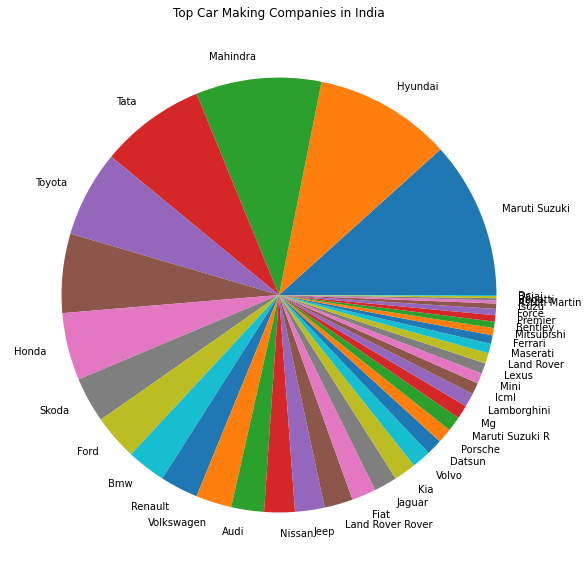

In [37]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Make.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()

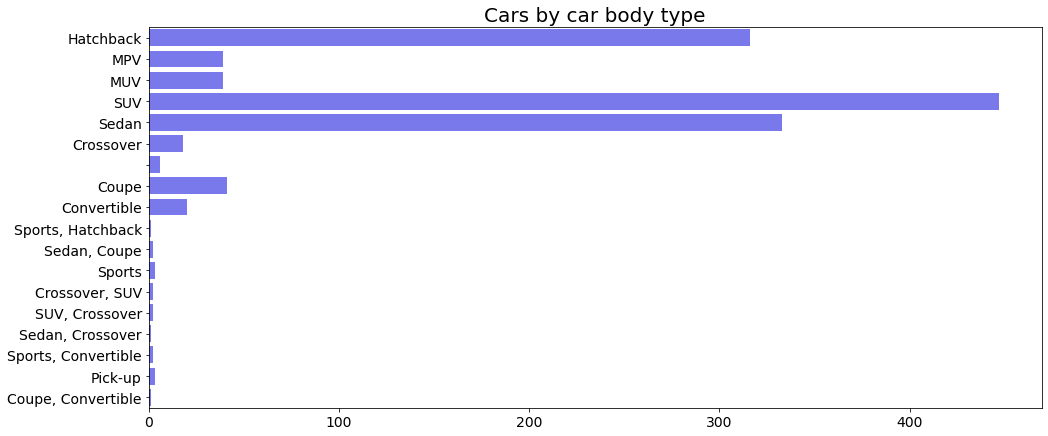

In [40]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Body_Type',alpha=.6,color='blue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

In [42]:
PriceByType = df.groupby('Body_Type').sum().sort_values('Ex-Showroom_Price', ascending=False)
PriceByType = PriceByType.reset_index()
px.bar(x='Body_Type', y ="Ex-Showroom_Price", data_frame=PriceByType)

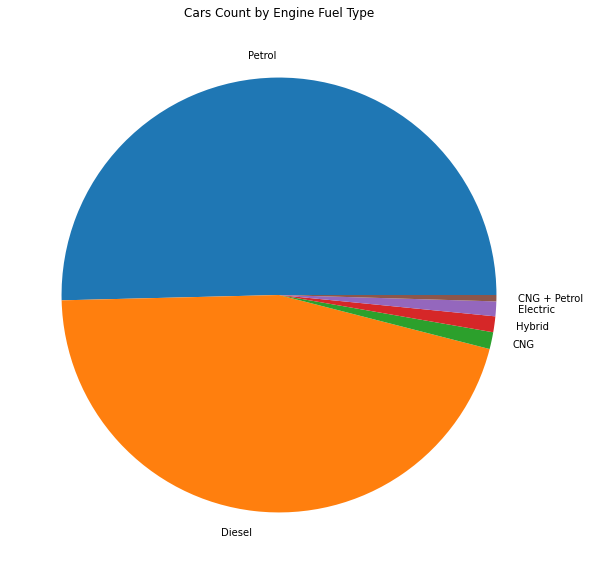

In [43]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Fuel_Type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Engine Fuel Type")
plt.show()

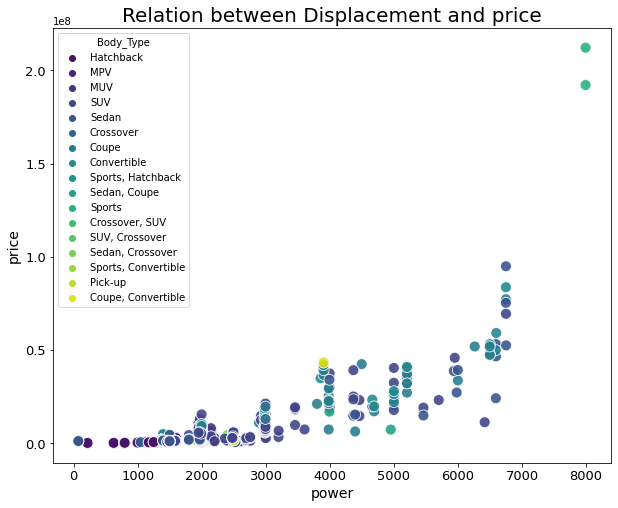

In [71]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Displacement', y='Ex-Showroom_Price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between Displacement and price',fontsize=20);


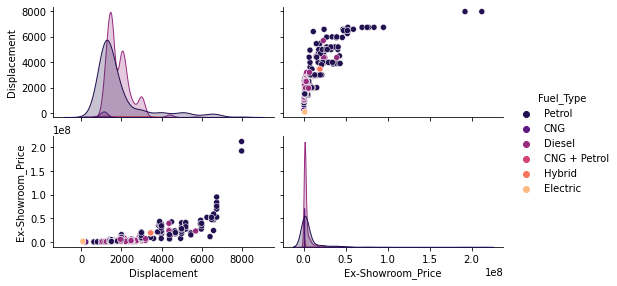

In [57]:
sns.pairplot(df,vars=[ 'Displacement', 'Ex-Showroom_Price'], hue= 'Fuel_Type', palette=sns.color_palette('magma'),diag_kind='kde',height=2, aspect=1.8);

In [61]:
fig = px.scatter_3d(df, x='Displacement', z='Ex-Showroom_Price', y='Fuel_Type',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();